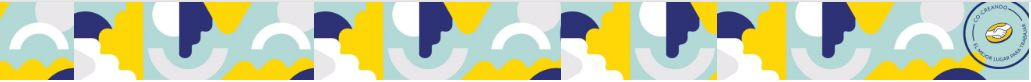


>   
    Fecha               | 12/05/2024
    Realizado por       | Francisco Guzmán
    Objetivo            | Crear bases para el ejercicio de SQL
    

Este programa genera las bases de customers y orders  para dar solución a lo pedido en el challenge:

- Listar los usuarios que cumplan años el día de hoy cuya cantidad de ventas realizadas en enero 2020 sea superior a 1500.

- Por cada mes del 2020, se solicita el top 5 de usuarios que más vendieron($) en la categoría Celulares. Se requiere el mes y año de análisis, nombre y apellido del vendedor, cantidad de ventas realizadas, cantidad de productos vendidos y el monto total transaccionado.


-**Customer:** Es la entidad donde se encuentran todos nuestros usuarios, ya sean Buyers o Sellers del Site. Los principales atributos son email, nombre, apellido, sexo, dirección, fecha de nacimiento, teléfono, entre otros.

-**Order:** La order es la entidad que refleja las transacciones generadas dentro del site (cada compra es una order). En este caso no vamos a contar con un flujo de carrito de compras por lo tanto cada ítem que se venda será reflejado en una order independientemente de la cantidad que se haya comprado.

### librerias

In [ ]:
pip install Faker #instalamos el generador de info

In [ ]:
import random
import string
import datetime
import pandas as pd
from faker import Faker
from google.colab import drive

In [ ]:
#damos acceso al drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Clientes

El programa genera base de clientes ramdon con nombre, sexo, mail y fecha de nacimiento. **Cada vez que se corre genera universo nuevo**.

In [50]:
#creamos un numero aleatorio de cliente

def generate_random_string():
    random_number = random.randint(0, 99999999)
    return f"{random_number:08d}"

customer = [generate_random_string() for _ in range(20)]

In [51]:
# iniciamos el faker
fake = Faker()

# dominios de mail
domains = ["@hotmail.com", "@gmail.com", "@meli.com"]

# genero
sexo_list = ['masculino', 'femenino']

# funcion para generar random nombre sexo mail nacimiento
def generate_random_customer():
    nombre = fake.name()
    sexo = random.choice(sexo_list)
    mail = generate_random_email(nombre)
    nacimiento = fake.date_of_birth(minimum_age=18, maximum_age=90)
    return {
        'nombre': nombre,
        'sexo': sexo,
        'mail': mail,
        'nacimiento': nacimiento
    }

# funcion para generar mail de acuerdo al nombre
def generate_random_email(nombre):
    domain = random.choice(domains)
    return f"{nombre.lower().replace(' ', '_')}{domain}"

# generamos 20 clientes
customer_data = [generate_random_customer() for _ in range(20)]

# creamos un dataframe
df = pd.DataFrame(customer_data)
#agregamos el numero de cliente
df['customer_id'] = customer
#cumpleañeros
df.nacimiento[1] = '1948-05-12'
df.nacimiento[3] = '1992-05-12'
df.nacimiento[4] = '2004-05-12'
df.nacimiento[6] = '1973-05-12'

In [52]:
#si se guarda en el drive el archivo podria dañar el resultado analizado.
#df.to_csv('/content/drive/MyDrive/challenge/outpus/customer_basic.csv',index =False )

In [53]:
df

,nombre,sexo,mail,nacimiento,customer_id
0,John Lopez,masculino,john_lopez@meli.com,1933-12-31,01646253
1,Amanda Thomas,masculino,amanda_thomas@gmail.com,1948-05-12,71333627
2,Victor Burgess,femenino,victor_burgess@hotmail.com,1970-04-10,86800636
3,Eugene King,masculino,eugene_king@gmail.com,1992-05-12,76841209
4,Jose Weber,masculino,jose_weber@hotmail.com,2004-05-12,23372047
5,Kent Wright,femenino,kent_wright@gmail.com,1945-04-07,73337028
6,Brian Aguilar,femenino,brian_aguilar@meli.com,1973-05-12,87958531
7,Frank Jackson,femenino,frank_jackson@meli.com,1973-07-23,68686523
8,Adam Hansen,femenino,adam_hansen@meli.com,1968-06-06,99394560
9,Cynthia Dixon,femenino,cynthia_dixon@gmail.com,1978-03-07,22362272


# Orders

El programa genera base de ordenes para el periodo enero diciembre 2020, 80% enfocado a celulares - smartphones, y 20% resto de subcategorias dentro de la rama **tecnologia**.

Los datos para cada orden son ramdons y se asignan de acuerdo a los valores definidos en las listas. Se decidio asi por el enfoque del ejercicio.

In [54]:
#Calendario 2020
#fecha de inicio
start_date = datetime.date(2020, 1, 1)
#fecha de fin
end_date = datetime.date(2020, 12, 31)
#lista de fechas
calendario_2020 = []
#generamos las listas
current_date = start_date
while current_date <= end_date:
    calendario_2020.append(current_date)
    current_date += datetime.timedelta(days=1)
# definimos categoria modelo precio y cantidad
categorias = ['Consolas y Videojuegos', 'Cámaras y Accesorios', 'Electrónica, Audio y Video', 'Tecnología', 'Televisores']
categoria_b_principal = ["Celulares y Smartphones"]
categorias_b_otras = ['Accesorios para Audio y Video', 'Accesorios para Celulares', 'Accesorios para Cámaras', 'Audio', 'Audio para Vehículos','Componentes Electrónicos',"Celulares y Teléfonos",
                    'Componentes de PC', 'Computación', 'Conectividad y Redes', 'Consolas y Videojuegos', 'Cámaras Digitales', 'Cámaras y Accesorios', 'Drones y Accesorios', 'Electrónica, Audio y Video',
                    'Impresión', 'PC', 'Para PlayStation', 'Tablets y Accesorios', 'Televisores', 'Videojuegos']
celulares = ['Motorola DynaTAC','Nokia 3310','BlackBerry Curve','iPhone','Motorola Razr V3','Nokia 1100','Sony Ericsson T68i','Samsung Galaxy S','Motorola StarTAC','BlackBerry Bold 9000']
pvp = [2000,5000,4577,7900,880,9000,6000,6500,3000,10000]
qty = [1,2,3,4]

In [55]:
#numero ramdonm de orden ARORDERID means Argentina order id
def generate_random_ORDERID():
    random_number = random.randint(0, 99999999)
    return f"ARORDERID{random_number:08d}"

In [56]:
orders_80 = [generate_random_ORDERID() for _ in range(80)] #universo de 80registros
orders_20 = [generate_random_ORDERID() for _ in range(20)] #universo de 20registros

In [57]:
universo_80 = pd.DataFrame(orders_80, columns=["orders"])

# asignamos categoria a cada orden
universo_80['sub_categoria'] = random.choices(categoria_b_principal, k=len(universo_80))
universo_80['modelo'] = random.choices(celulares, k=len(universo_80))
universo_80['precio'] = random.choices(pvp, k=len(universo_80))
universo_80['cantidad'] = random.choices(qty, k=len(universo_80))
universo_80['fecha_venta'] = random.choices(calendario_2020, k=len(universo_80))
universo_80['customer_id'] = random.choices(customer, k=len(universo_80))

In [58]:
universo_20 = pd.DataFrame(orders_20, columns=["orders"])

# asignamos categoria a cada orden
universo_20['sub_categoria'] = random.choices(categorias_b_otras, k=len(universo_20))
universo_20['modelo'] = [str('na') for x in universo_20.orders]
universo_20['precio'] = random.choices(pvp, k=len(universo_20))
universo_20['cantidad'] = random.choices(qty, k=len(universo_20))
universo_20['fecha_venta'] = random.choices(calendario_2020, k=len(universo_20))
universo_20['customer_id'] = random.choices(customer, k=len(universo_20))

In [59]:
base_ventas = pd.concat([universo_80, universo_20], ignore_index=True)

In [60]:
base_ventas['categoria'] = [str('tecnologia') for x in base_ventas.orders]

In [61]:
base_ventas.sample(4)

,orders,sub_categoria,modelo,precio,cantidad,fecha_venta,customer_id,categoria
64,ARORDERID08193537,Celulares y Smartphones,Samsung Galaxy S,2000,4,2020-10-16,22362272,tecnologia
95,ARORDERID86615110,Televisores,na,6500,1,2020-03-29,99394560,tecnologia
47,ARORDERID03954249,Celulares y Smartphones,Samsung Galaxy S,10000,4,2020-03-18,71333627,tecnologia
2,ARORDERID37663754,Celulares y Smartphones,BlackBerry Curve,2000,3,2020-10-18,76841209,tecnologia


In [62]:
#si se guarda en el drive el archivo podria dañar el resultado analizado.
#base_ventas.to_csv('/content/drive/MyDrive/challenge/outpus/base_ventas.csv',index =False )